## Задание по 1 и 2 занятиям
## Математический анализ

https://docs.sympy.org/latest/tutorial/intro.html

In [1]:
#Вначале для простоты будем подключать модуль sympy целиком
from sympy import  Symbol, symbols, prod, factorial, sqrt, Eq, pi, \
    plot, plot_implicit, plot_parametric, sin, tan, cot, exp, log
        

### Функции пользователя
#### Задание 1
Описать функцию $f(x,n)=x(x+1)...(x+n-1)(x+n)$, $n>0$, вычислить  $f(6,7)$, $f(x,4)$, $f(y + z,x)$.      

In [2]:
def f(x, n):
    if isinstance(n, int):
        assert n > 0
        return prod((x + i for i in range(n + 1)))
    else:
        # x*(x+1)*...*(x+n-1)*(x+n) = (x + n)! / (x - 1)!
        return factorial(x + n) / factorial(x - 1)

x, y, z = symbols("x y z")
print("f(6, 7):")
display(f(6, 7))
print("f(x, 4):")
display(f(x, 4))
print("f(y + z, x):")
display(f(y + z, x))


f(6, 7):


51891840

f(x, 4):


x*(x + 1)*(x + 2)*(x + 3)*(x + 4)

f(y + z, x):


factorial(x + y + z)/factorial(y + z - 1)

#### Задание 2
Описать функцию $right\_ratio(f, x, delta\_x)$, вычисляющую правое разностное отношение функции $f$ в точке $x$ при $\Delta x$, т.е. $\frac{f(x+\Delta x)-f(x)}{\Delta x}$. 

Аргумент $ delta\_x$ по умолчанию равен 1.

Вычислить правое разностное отношение $\sin$ в точке $\frac{\pi}{4}$ со значением $\Delta x$ равным  $\frac{\pi}{6}$ 

и правое разностное отношение $e^x$ при $x=3$ со значением $\Delta x$  по умолчанию. Для вычисления $e^x$ воспользоваться функцией Sympy $\exp(x)$.

In [3]:
def right_ratio(f, x, delta_x = 1):
    return (f(x + delta_x) - f(x))/delta_x

print("right_ratio(sin, pi / 4, pi / 6):")
display(right_ratio(sin, pi/4, pi/6))

print("right_ratio(e^x, 3, 1):")
display(right_ratio(exp, 3))

right_ratio(sin, pi / 4, pi / 6):


6*(-sqrt(2)/4 + sqrt(6)/4)/pi

right_ratio(e^x, 3, 1):


-exp(3) + exp(4)

#### Задание 3
Опиcать функцию $square\_roots$, возвращающую корни квадратного уравнения $a x^2 + bx + c = 0$  с вещественными аргументами $a\neq 0$, b, c и  необязательным параметром $is\_real$, по умолчанию равным $True$. Функция возвращает список корней уравнения. Если корни комплексные, а $is\_real=True$, то функция возвращает пустой список. Если корень один, то в списке корней он тоже должен быть один.

Решить уравнения в вещественных числах:

а) $3x^2+8x+4=0$, 

б) $x^2-4x+4=0$

в) $2x^2+x+1=0$

Уравнение в) решить отдельно в комплексных числах.

Для красивого представления комплексных чисел можно воспользоваться функцией display.

Если элементы списка нужно выводить в столбик, можно воспользоваться display(\*имя_списка) (\* в данном случае служебный символ)

In [4]:
def square_roots(a, b, c, is_real: bool = True) -> tuple:
    assert a != 0
    d = b*b - 4*a*c    
    if d == 0:
        return (-b/(2*a),)
    if d < 0 and is_real:
        return ("Equation has complex roots, but is_real = True",)
    d_sqrt = sqrt(d)
    return ((-b + d_sqrt)/(2*a), (-b - d_sqrt)/(2*a)) 

vars = (
    (3, 8, 4, True),
    (1, -4, 4, True),
    (2, 1, 1, True),
    (2, 1, 1, False),
)

for a, b, c, is_real in vars:
    report = f"""Solution(s) of equation when a = {a}, b = {b}, c = {c} and roots {"can't" if is_real else "can"} be complex:"""
    print(report)
    display(*square_roots(a, b, c, is_real))

Solution(s) of equation when a = 3, b = 8, c = 4 and roots can't be complex:


-2/3

-2

Solution(s) of equation when a = 1, b = -4, c = 4 and roots can't be complex:


2.0

Solution(s) of equation when a = 2, b = 1, c = 1 and roots can't be complex:


'Equation has complex roots, but is_real = True'

Solution(s) of equation when a = 2, b = 1, c = 1 and roots can be complex:


-1/4 + sqrt(7)*I/4

-1/4 - sqrt(7)*I/4

#### Задание 4
Описать функцию $less\_c(my\_list,c)$, возвращающую первый попавшийся элемент списка $my\_list$, меньший $c$, и его номер в списке. Если таких элементов нет, возвращается ($None, None$).

Вызвать функцию $less\_c(my\_list,c)$ со списком $my\_list = [3, -2, 8]$ и $c = - 4$, затем с тем же списком, но $c = 1$.

С помощью этой функции найти четное натуральное число $n$ до 100 (включительно), такое что $\sin n <\frac12$, построив предварительно список $list\_sin$ синусов четных натуральных чисел (строить список с помощью for и range). 

### Графики в Sympy
 

#### Задание 5
Построить на отрезке $[-2\pi,2\pi]$ график $tg(x)$ зеленым цветом, а график $ctg(x)$ красным, задать предел по вертикальной оси (-5, 5). 

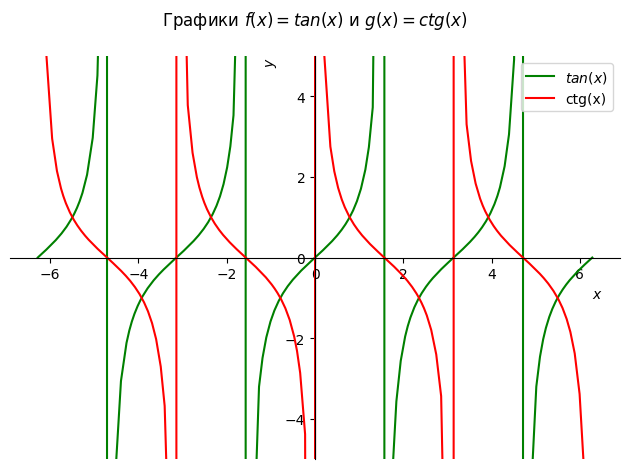

In [5]:
x = Symbol('x')

title = "Графики $f(x) = tan(x)$ и $g(x) = ctg(x)$\n"
x_interval = (x, -2*pi, 2*pi)
x_label_align = "\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t"
y_label_align = "\t\t\t\t\t\t\t\t\t\t\t "

p_tan = plot(
    tan(x), 
    x_interval,
    title=title,
    xlabel=x_label_align + "$x$", 
    ylabel=y_label_align + "$y$", 
    ylim=(-5, 5), 
    label="$tan(x)$", 
    legend=True, 
    line_color='g', 
    show=False
)
p_cot = plot(
    cot(x),
    x_interval,
    label="ctg(x)",
    legend=True, 
    line_color='r',
    show=False
)
p_tan.append(p_cot[0])
p_tan.show()

#### Задание 6
Построить графики логарифма по основанию 2, 10, $1/2$ и натурального логарифма в одной плоскости, каждый график отдельным цветом ('red', 'green', 'black', 'pink'). Отобразить название графика "Логарифмы по основанию 2, 10, $1/2$ и $e$", подписать горизонтальную ось $\phi$, вертикальную ось $\log_a\phi$. 
Включить легенду, в ней все функции подписать своими формулами, например, натуральный логарифм $\ln \phi$, десятичный $\lg \phi$.

#### Указание.
Можно составить подходящий словарь, list или tuple и использовать его в plot.
Вначале можно построить только координатную плоскость с надписью графика и подписями осей, а также legend=True, а затем в цикле добавлять с помощью append графики логарифмов разных цветов.

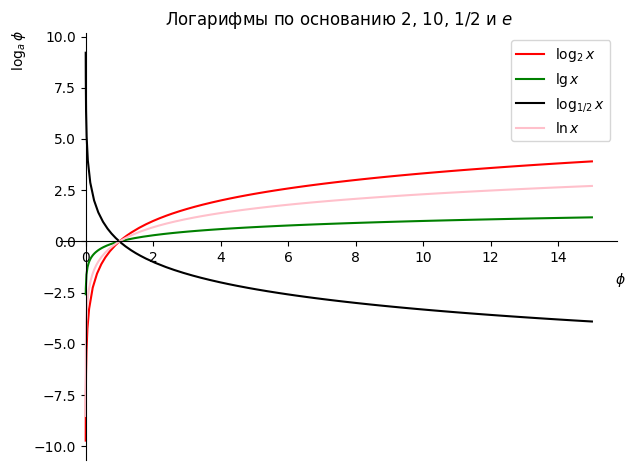

In [6]:
x = Symbol('x')
x_interval = (x, -1, 15)

functs_params = (
    (log(x, 2), "$\log_2 x$", "red"),
    (log(x, 10), "$\lg x$", "green"),
    (log(x, 1 / 2), "$\log_{1/2} x$", "black"),
    (log(x), "$\ln x$", "pink"),
)

title = "Логарифмы по основанию 2, 10, $1/2$ и $e$"
x_label_align = "\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t"
y_label_align = "\t\t\t\t\t\t\t\t\t\t\t "
p = plot(
    title=title,
    xlabel=x_label_align + "$\phi$",
    ylabel=y_label_align + "$\log_a \phi$",
    legend=True, 
    show=False
)
for tupl in functs_params:
    p.append(plot(
        tupl[0],
        x_interval,
        label=tupl[1],
        legend=True,
        line_color=tupl[2],
        show=False
    )[0])

p.show()

#### Задание 7
Изобразить на графике гиперболу, заданную своим каноническим уравнением
$$
\frac{x^2}{a^2}-\frac{y^2}{b^2}=1,
$$
при $a=3$, $b=5$. Масштаб по осям одинаковый, рекомендуемый интервал (-10, 10).

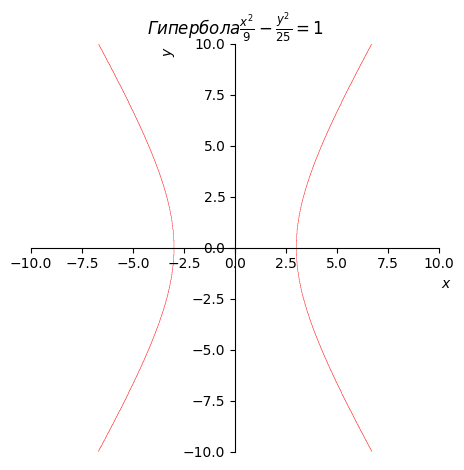

In [7]:
x, y, a, b = symbols("x y a b")
a_val = 3; b_val = 5

title = r"$Гипербола\frac{0}{1}{2}{3} - \frac{4}{5}{6}{7} = 1$".format("{x^2}", "{", a_val*a_val, "}", "{y^2}", "{", b_val*b_val, "}")
expression = Eq(x**2 / a**2 - y**2 / b**2, 1)
x_label_align = "\t\t\t\t\t\t\t\t\t\t\t\t"
y_label_align = "\t\t\t\t\t\t\t\t\t\t\t "
p = plot_implicit(
    expression.subs({a: 3, b: 5}),
    (x, -10, 10),
    (y, -10, 10),
    aspect_ratio=(1, 1),
    title=title,
    xlabel=x_label_align + "$x$",
    ylabel=y_label_align + "$y$",
    line_color="r",
    show=False
)

p.show()

### Индивидуальное задание (файл Ind_tasks_...)
Построить график параметрически заданной функции с соответствующими уравнениям подписями к осям. 
В легенде отразить уравнения функции в строчку.

##### var 50.
$$
\begin{equation*}
  \left\{
    \begin{aligned}
      & \phi(\epsilon) = \frac{4\epsilon^2}{\epsilon^2 + 1} \\
      & \psi(\epsilon) = \frac{4\epsilon^3}{\epsilon^2 + 1} 
    \end{aligned}
  \right.
\end{equation*}
$$

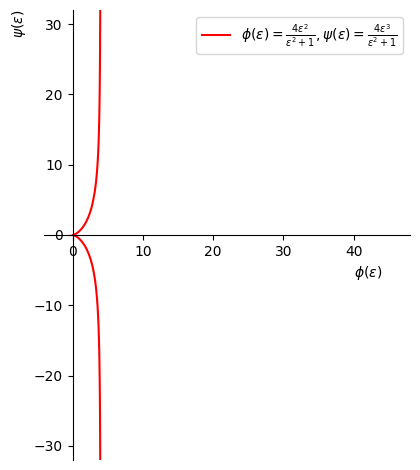

In [8]:

def phi_func(epsilon):
    eps_2 = epsilon*epsilon
    return 4*eps_2/(eps_2 + 1)

def psi_func(epsilon):
    eps_2 = epsilon*epsilon
    return 4*eps_2*epsilon/(eps_2 + 1)

phi, psi, eps = symbols("φ ψ ε")

x_label_align = "\t\t\t\t\t\t\t\t"
y_label_align = "\t\t\t\t\t\t\t\t\t\t\t\t"
p = plot_parametric(
    phi_func(eps), 
    psi_func(eps), 
    (eps, -10, 10), 
    aspect_ratio=(1, 1), 
    axis_center=(0, 0),
    xlim=(-4, 48), 
    ylim=(-32, 32),
    xlabel=x_label_align + "$\phi(\epsilon)$", 
    ylabel=y_label_align + "$\psi(\epsilon)$", 
    legend=True, 
    line_color='r',
    label=r"$\phi(\epsilon) = \frac{4\epsilon^2}{\epsilon^2 + 1}, \psi(\epsilon) = \frac{4\epsilon^3}{\epsilon^2 + 1}$",
    show=False
)

p.show()
